In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,confusion_matrix,classification_report,r2_score
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# **Calssification**

In [61]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [62]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [63]:
df.drop("deck",axis=1,inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [64]:
df["age"] = df["age"].fillna(df["age"].mean())

In [65]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [66]:
df.dropna(inplace=True)

In [67]:
df.drop_duplicates(inplace=True)

In [68]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 778 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     778 non-null    int64   
 1   pclass       778 non-null    int64   
 2   sex          778 non-null    object  
 3   age          778 non-null    float64 
 4   sibsp        778 non-null    int64   
 5   parch        778 non-null    int64   
 6   fare         778 non-null    float64 
 7   embarked     778 non-null    object  
 8   class        778 non-null    category
 9   who          778 non-null    object  
 10  adult_male   778 non-null    bool    
 11  embark_town  778 non-null    object  
 12  alive        778 non-null    object  
 13  alone        778 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 75.3+ KB


In [70]:
categorical = df.select_dtypes(include=["object","category"]).columns
numerical = df.select_dtypes(include=["int64","float64"]).columns
print("Categorial: ",categorical)
print("Numerical: ",numerical)

Categorial:  Index(['sex', 'embarked', 'class', 'who', 'embark_town', 'alive'], dtype='object')
Numerical:  Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')


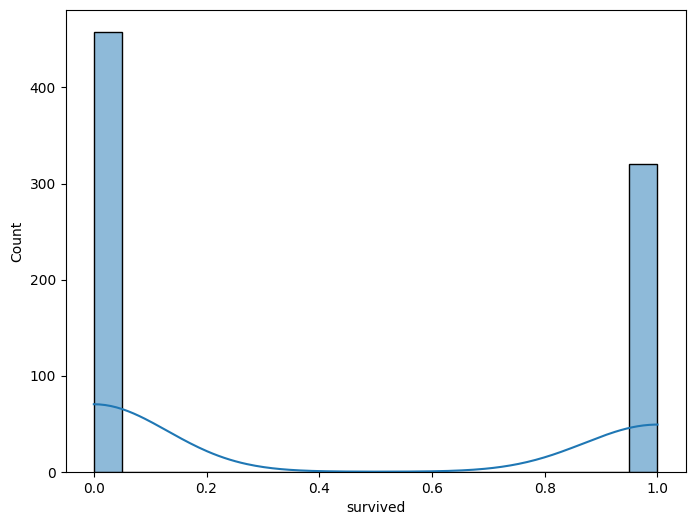

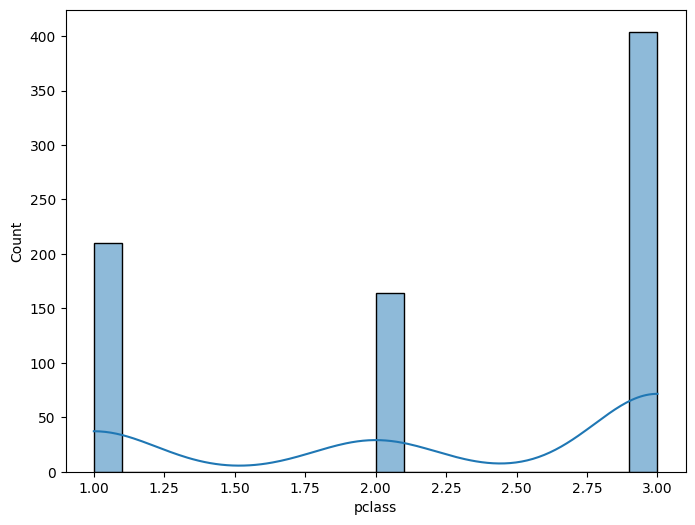

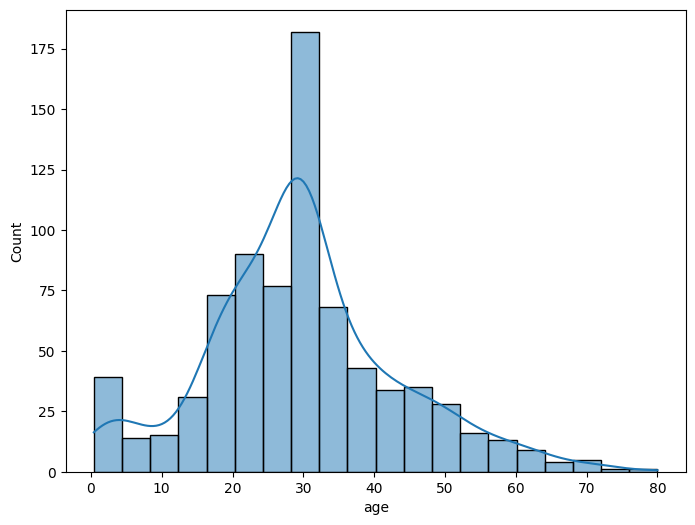

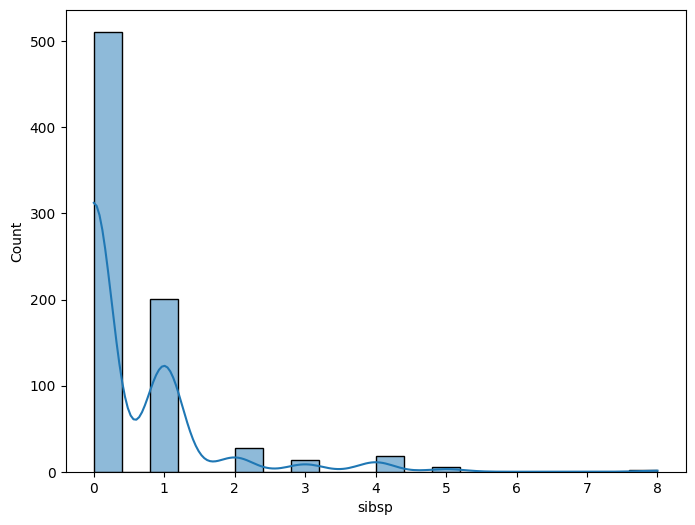

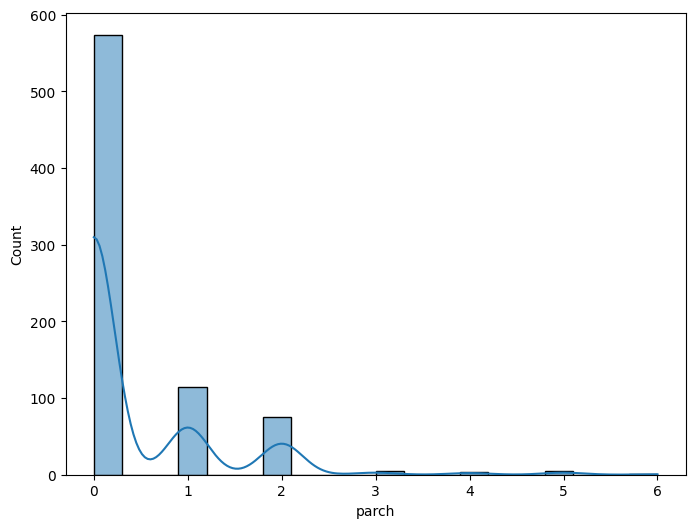

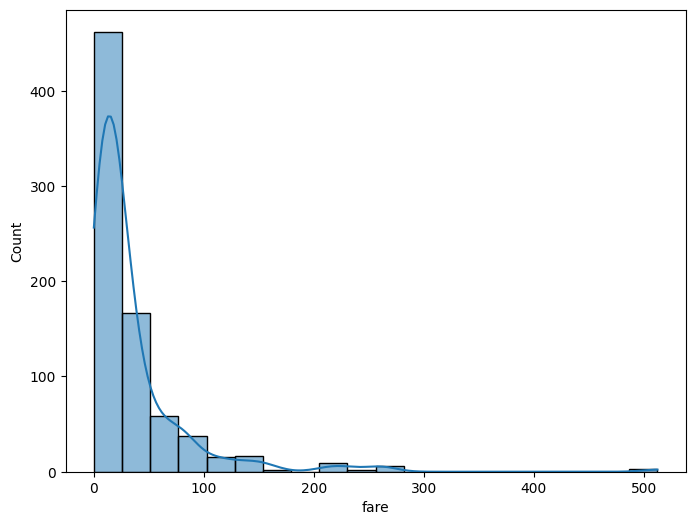

In [71]:
for col in numerical:
  plt.figure(figsize=(8,6))
  sns.histplot(df[col],kde=True,bins=20)
  plt.show()

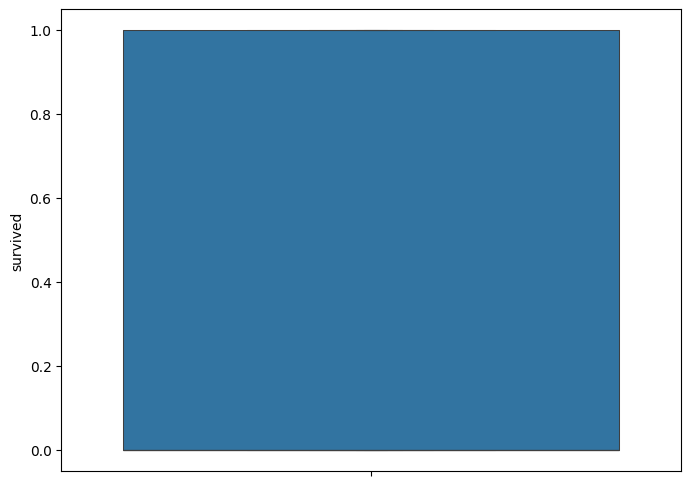

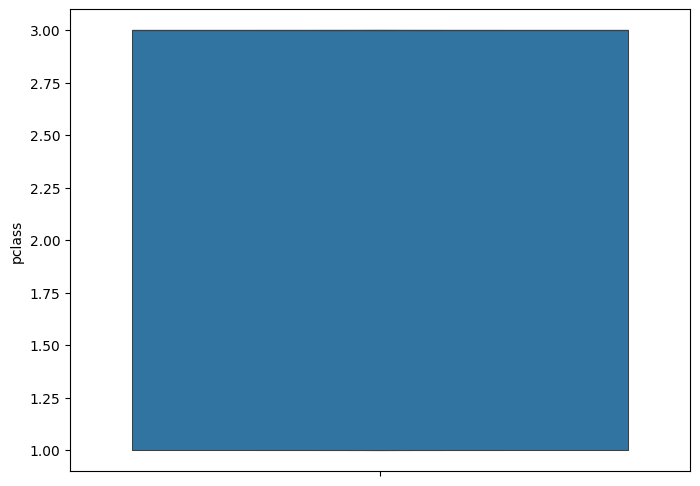

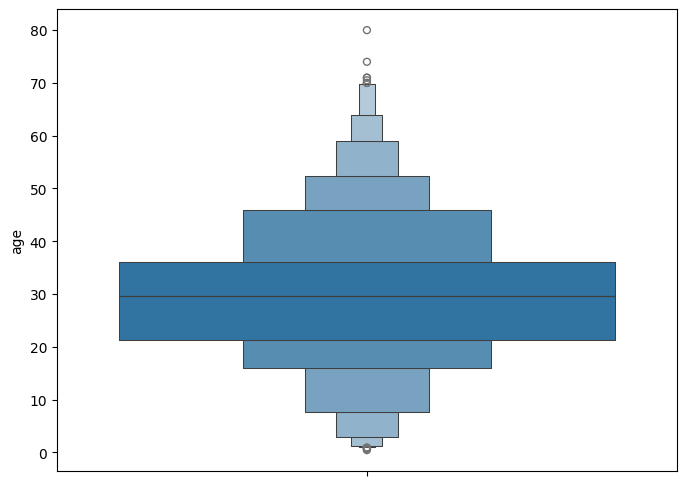

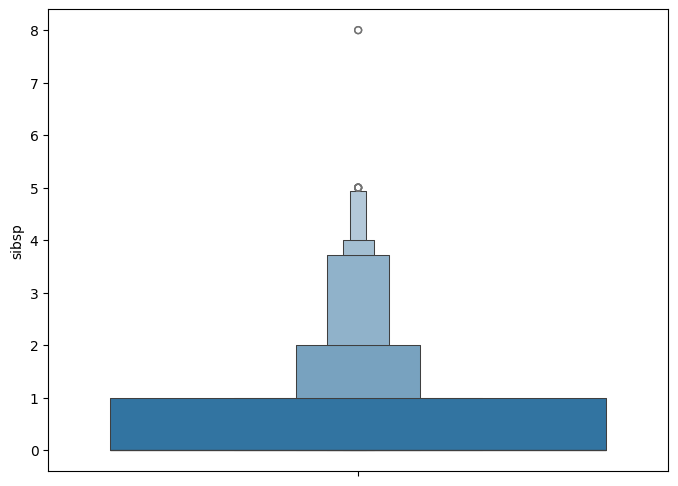

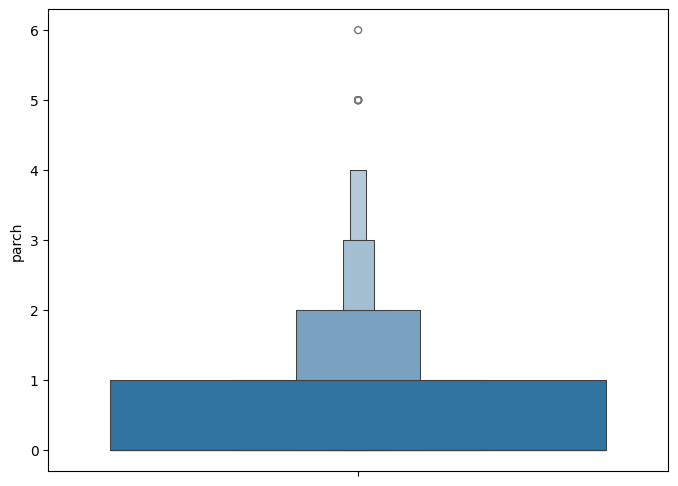

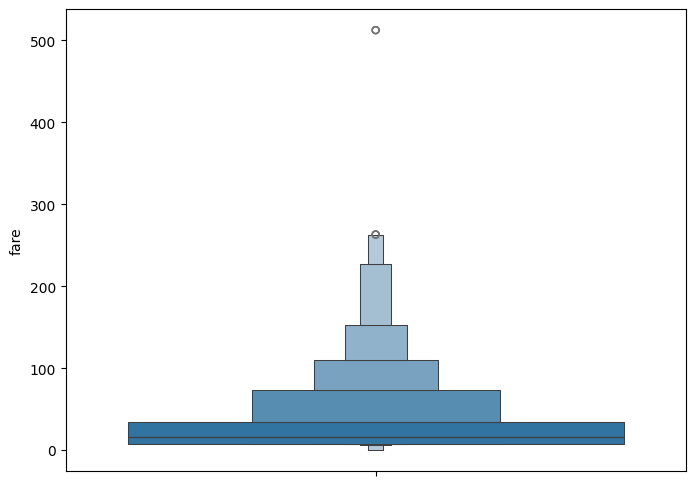

In [72]:
for col in numerical:
  plt.figure(figsize=(8,6))
  sns.boxenplot(df[col])
  plt.show()

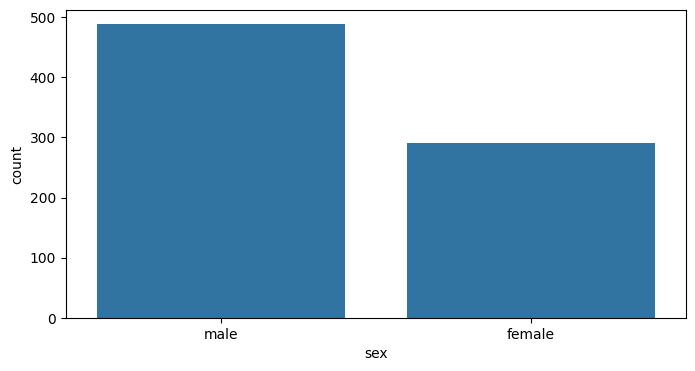

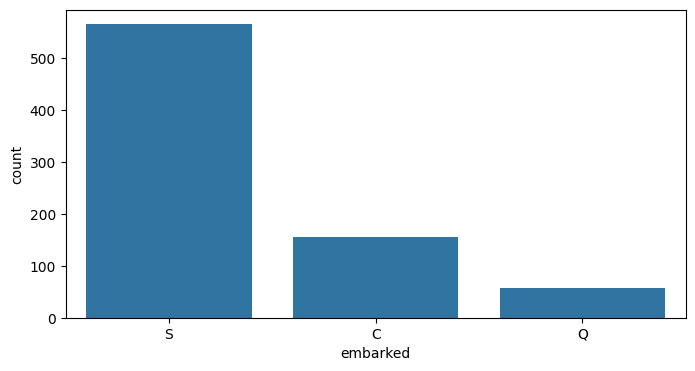

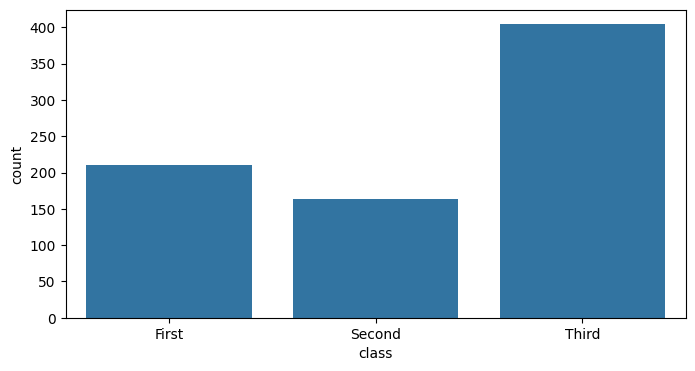

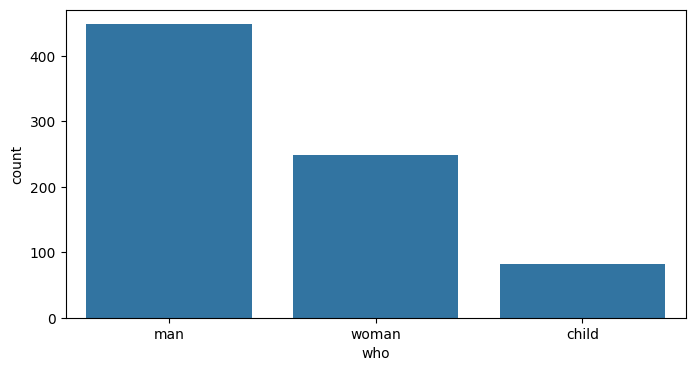

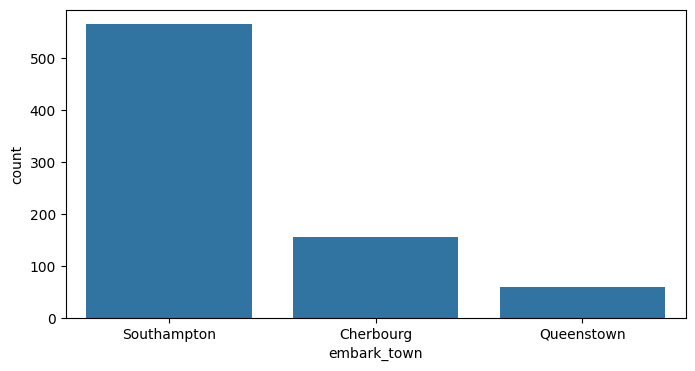

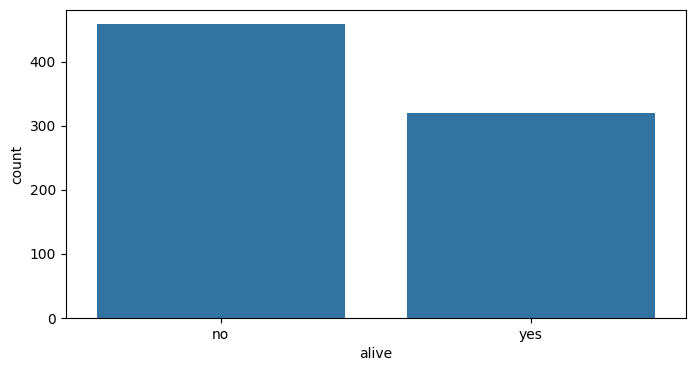

In [73]:
for col in categorical:
  plt.figure(figsize=(8,4))
  sns.countplot(data=df,x=df[col])

<Axes: >

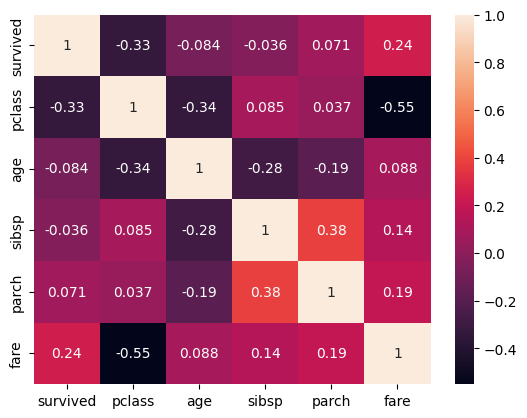

In [74]:
sns.heatmap(df[numerical].corr(),annot=True)

In [75]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [76]:
label_en =[col for col in categorical if df[col].nunique() == 2]
hot_en =[col for col in categorical if df[col].nunique() > 2]
print(f"label: {label_en}")
print(f"Hot: {hot_en}")

label: ['sex', 'alive']
Hot: ['embarked', 'class', 'who', 'embark_town']


In [77]:
le = LabelEncoder()

In [78]:
for col in label_en:
  df[col] = le.fit_transform(df[col])

In [79]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,Southampton,0,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,1,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,Southampton,1,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,Southampton,1,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,Southampton,0,True


In [80]:
df = pd.get_dummies(df,columns=hot_en)

In [81]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'adult_male', 'alive', 'alone', 'embarked_C', 'embarked_Q',
       'embarked_S', 'class_First', 'class_Second', 'class_Third', 'who_child',
       'who_man', 'who_woman', 'embark_town_Cherbourg',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

In [82]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone,...,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,7.2500,True,0,False,...,True,False,False,True,False,True,False,False,False,True
1,1,1,0,38.0,1,0,71.2833,False,1,False,...,False,True,False,False,False,False,True,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,1,True,...,True,False,False,True,False,False,True,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,1,False,...,True,True,False,False,False,False,True,False,False,True
4,0,3,1,35.0,0,0,8.0500,True,0,True,...,True,False,False,True,False,True,False,False,False,True


In [83]:
X = df.drop('survived', axis=1)
y = df['survived']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [85]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
clf_models = {
    "Logictic Regression":LogisticRegression(),
    "Naive Bayes":GaussianNB(),
    "KNN":KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM":SVC(probability=True,random_state=42)
}

In [87]:
results = []
for name,model in clf_models.items():
  model.fit(X_train_scaled,y_train)
  y_pred = model.predict(X_test_scaled)
  acc = accuracy_score(y_test,y_pred)
  report = classification_report(y_test,y_pred)
  matrix = confusion_matrix(y_test,y_pred)
  results.append({
      'Model':name,
      'Accuracy':acc,
      'Matrix': matrix,
      'Report': report
  })


In [88]:
results

[{'Model': 'Logictic Regression',
  'Accuracy': 1.0,
  'Matrix': array([[92,  0],
         [ 0, 64]]),
  'Report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        92\n           1       1.00      1.00      1.00        64\n\n    accuracy                           1.00       156\n   macro avg       1.00      1.00      1.00       156\nweighted avg       1.00      1.00      1.00       156\n'},
 {'Model': 'Naive Bayes',
  'Accuracy': 1.0,
  'Matrix': array([[92,  0],
         [ 0, 64]]),
  'Report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        92\n           1       1.00      1.00      1.00        64\n\n    accuracy                           1.00       156\n   macro avg       1.00      1.00      1.00       156\nweighted avg       1.00      1.00      1.00       156\n'},
 {'Model': 'KNN',
  'Accuracy': 0.9615384615384616,
  'Matrix': array([[89,  3],
         [ 3, 61]])

In [89]:
result_df = pd.DataFrame(results)
result_df

,Model,Accuracy,Matrix,Report
0,Logictic Regression,1.000000,"[[92, 0], [0, 64]]",precision recall f1-score ...
1,Naive Bayes,1.000000,"[[92, 0], [0, 64]]",precision recall f1-score ...
2,KNN,0.961538,"[[89, 3], [3, 61]]",precision recall f1-score ...
3,Decision Tree,1.000000,"[[92, 0], [0, 64]]",precision recall f1-score ...
4,SVM,1.000000,"[[92, 0], [0, 64]]",precision recall f1-score ...


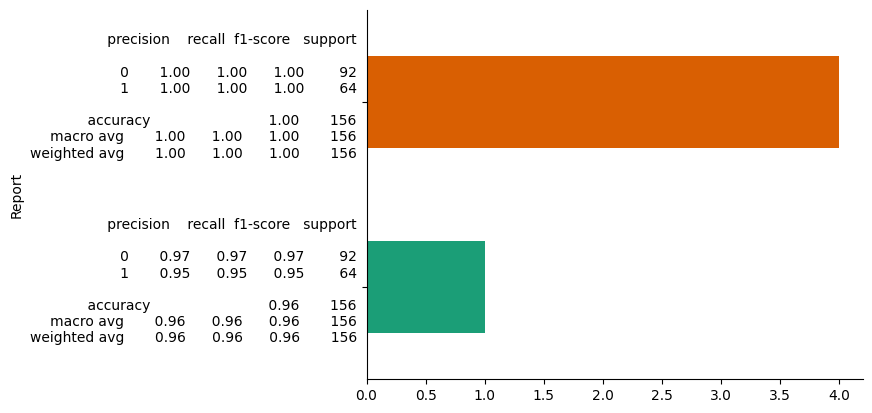

In [90]:
result_df.groupby('Report').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Regression**

In [91]:
df = sns.load_dataset("tips")

In [92]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [94]:
df.describe(include="all")

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [95]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [96]:
df.drop_duplicates(inplace=True)

In [97]:
categorical = df.select_dtypes(include=["object","category"]).columns
numerical = df.select_dtypes(include=["int64","float64"]).columns
print("Categorial: ",categorical)
print("Numerical: ",numerical)

Categorial:  Index(['sex', 'smoker', 'day', 'time'], dtype='object')
Numerical:  Index(['total_bill', 'tip', 'size'], dtype='object')


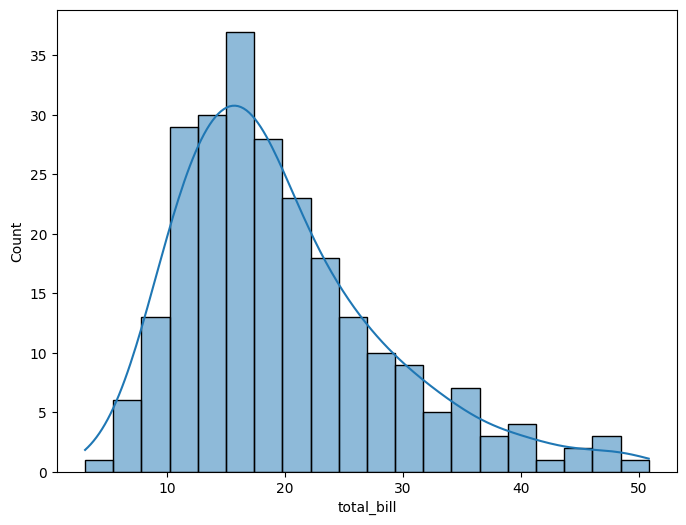

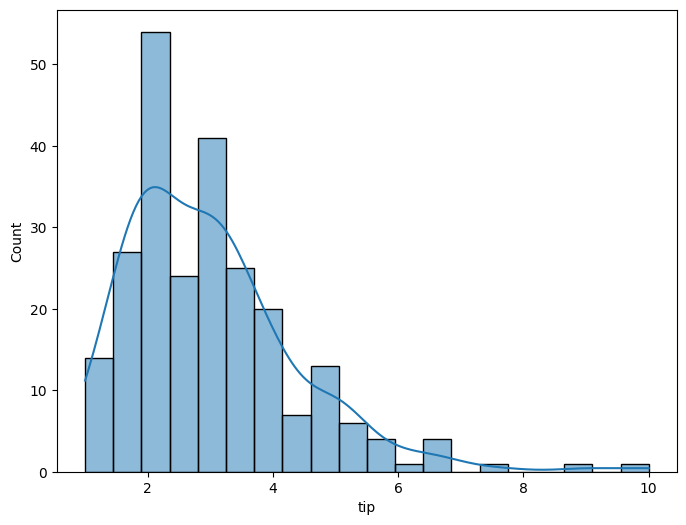

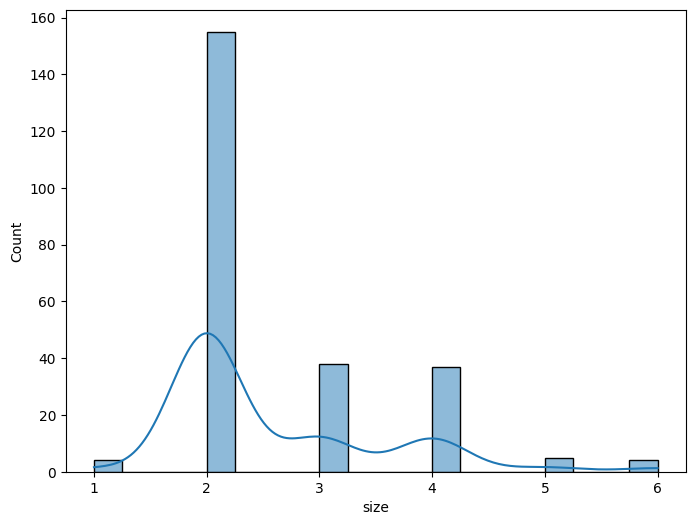

In [98]:
for col in numerical:
  plt.figure(figsize=(8,6))
  sns.histplot(df[col],kde=True,bins=20)
  plt.show()

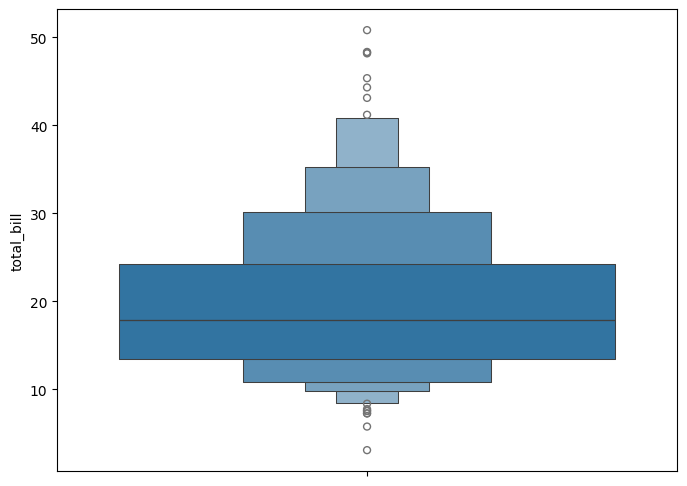

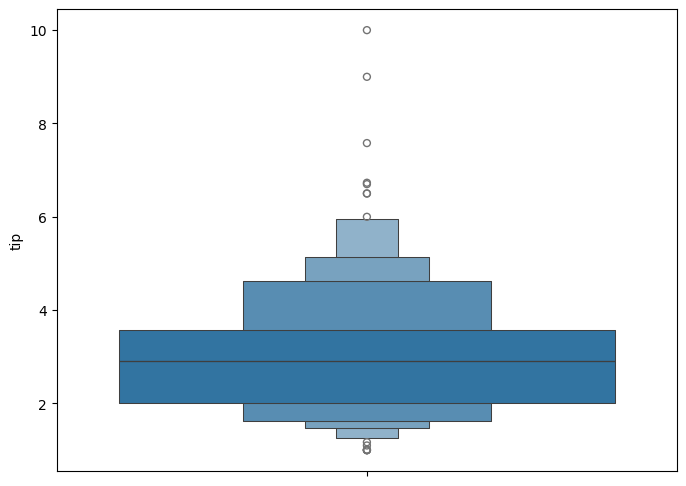

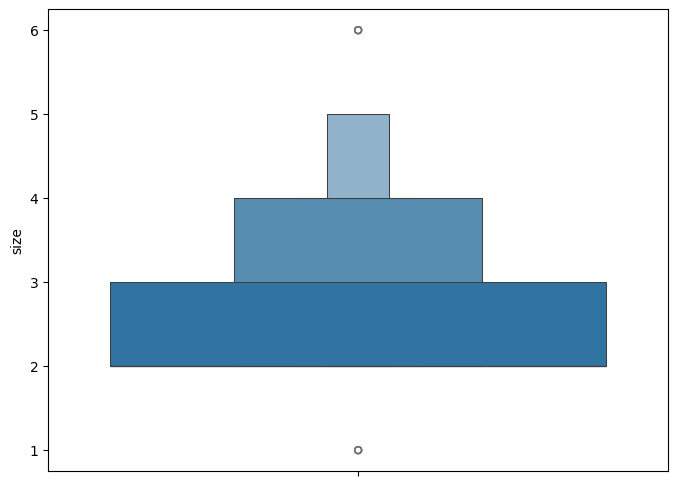

In [99]:
for col in numerical:
  plt.figure(figsize=(8,6))
  sns.boxenplot(df[col])
  plt.show()

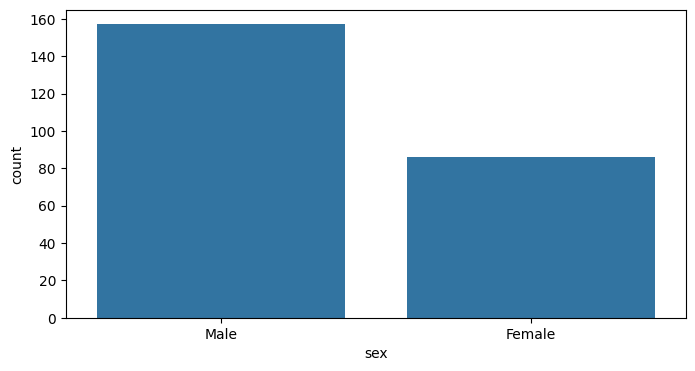

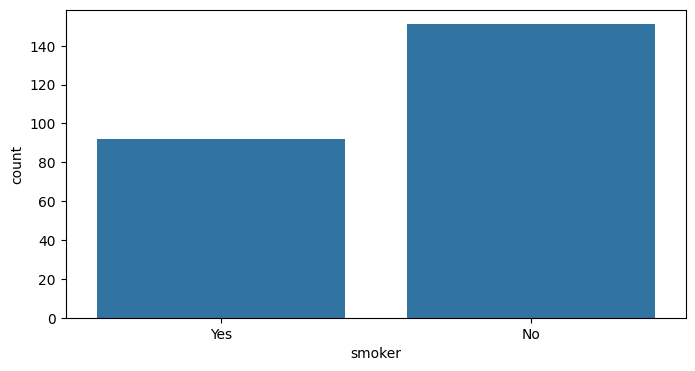

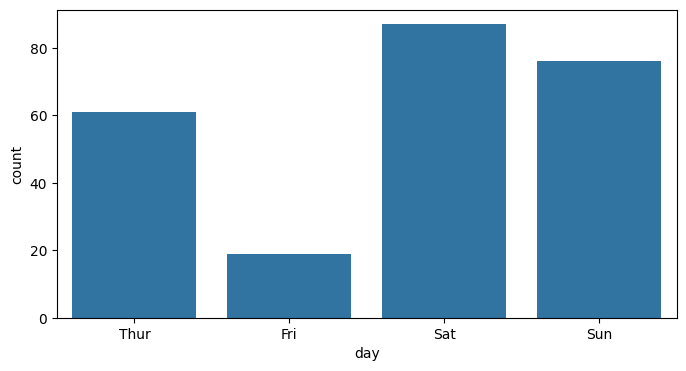

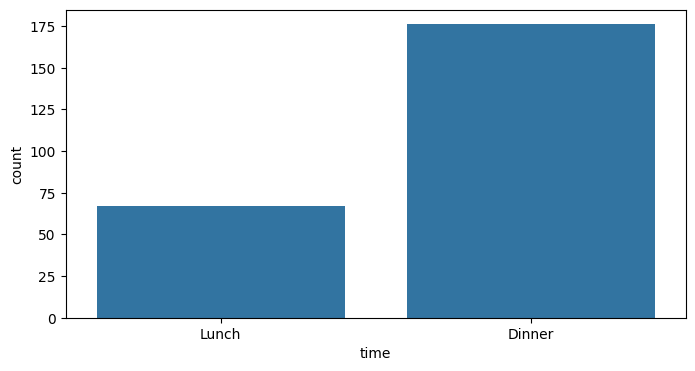

In [100]:
for col in categorical:
  plt.figure(figsize=(8,4))
  sns.countplot(data=df,x=df[col])

<Axes: >

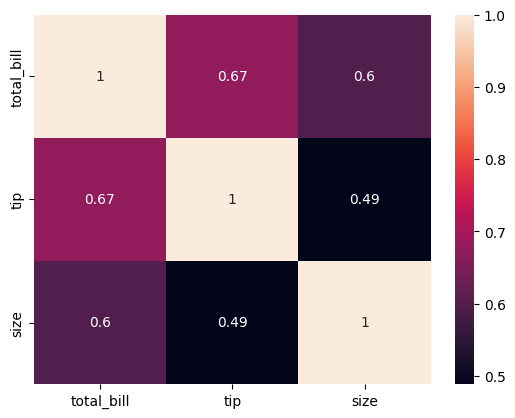

In [101]:
sns.heatmap(df[numerical].corr(),annot=True)

In [102]:
label_en =[col for col in categorical if df[col].nunique() == 2]
hot_en =[col for col in categorical if df[col].nunique() > 2]
print(f"label: {label_en}")
print(f"Hot: {hot_en}")

label: ['sex', 'smoker', 'time']
Hot: ['day']


In [103]:
le = LabelEncoder()

In [104]:
for col in label_en:
  df[col] = le.fit_transform(df[col])

In [105]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,0,2
1,10.34,1.66,1,0,Sun,0,3
2,21.01,3.50,1,0,Sun,0,3
3,23.68,3.31,1,0,Sun,0,2
4,24.59,3.61,0,0,Sun,0,4


In [106]:
df = pd.get_dummies(df,columns=hot_en)

In [107]:
df.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,0,0,0,2,False,False,False,True
1,10.34,1.66,1,0,0,3,False,False,False,True
2,21.01,3.50,1,0,0,3,False,False,False,True
3,23.68,3.31,1,0,0,2,False,False,False,True
4,24.59,3.61,0,0,0,4,False,False,False,True


In [108]:
X = df.drop('tip', axis=1)
y = df['tip']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [111]:
reg_models = {
    "Linear Regression":LinearRegression(),
    "KNN Regression": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor()
}

In [112]:
results = []
for name,model in reg_models.items():
  model.fit(X_train_scaled,y_train)
  y_pred = model.predict(X_test_scaled)
  mae = mean_absolute_error(y_test,y_pred)
  mse = mean_squared_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  results.append({
      'Model':name,
      'Mean Absolute Erroe':mae,
      'Mean Square Error': mse,
      'Root Mean Square Error': np.sqrt(mse),
      'R2 Score': r2,
  })


In [113]:
results

[{'Model': 'Linear Regression',
  'Mean Absolute Erroe': 0.8150332372129164,
  'Mean Square Error': 1.2410610164918043,
  'Root Mean Square Error': np.float64(1.1140291811670844),
  'R2 Score': 0.4906325778129058},
 {'Model': 'KNN Regression',
  'Mean Absolute Erroe': 0.8377551020408162,
  'Mean Square Error': 1.4008075918367344,
  'Root Mean Square Error': np.float64(1.1835571772570745),
  'R2 Score': 0.4250679518957394},
 {'Model': 'Decision Tree',
  'Mean Absolute Erroe': 0.9575510204081633,
  'Mean Square Error': 1.9107306122448982,
  'Root Mean Square Error': np.float64(1.382291797069236),
  'R2 Score': 0.2157807605589397}]

In [114]:
result_df = pd.DataFrame(results)

In [115]:
result_df

,Model,Mean Absolute Erroe,Mean Square Error,Root Mean Square Error,R2 Score
0,Linear Regression,0.815033,1.241061,1.114029,0.490633
1,KNN Regression,0.837755,1.400808,1.183557,0.425068
2,Decision Tree,0.957551,1.910731,1.382292,0.215781
